In [180]:
%%HTML
<h2> PROJETO 2 - UDACITY - FUNDAMENTOS DE DATA SCIENCE I - Ricardo Aurélio de Albuquerque</H2>
<p>Ideia para deflagrar análises - sugestão UDACITY</p>
<dt><i>Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?</i></dt>
<dd>A partir dessa ideia, presume-se que com os dados apresentados no Dataset, podem ser obtidas evidências e representá-las por meio
de números, modelos gráficos em torno da proposta. 
Também, outras perguntas, derivadas a partir da mencionada acima, são analisadas com base no Dataset.</dd>
<dt>Definição de <i>features</i></dt>
<dd><b>Sobreviveu (Sobreviveu):</b> 0 = Não, 1 = Sim</dd>
<dd><b>Pclass:</b> Categoria de classe 1 = 1ª classe, 2 = 2ª classe e 3 = 3ª classe</dd>
<dd><b>Sex:</b> Gênero do detentor do ingresso</dd>
<dd><b>Age:</b> Idade representada em anos</dd>
<dd><b>Sibsp:</b> Quantidade de irmãos / cônjuges a bordo do Titanic</dd>
<dd><b>Parch:</b> Quantidade de pais / crianças a bordo do Titanic</dd>
<dd><b>Ticket:</b> Número do bilhete de embarque</dd>
<dd><b>Fare:</b> Valor do bilhete pago</dd>
<dd><b>Cabin:</b> Nr de identificação da cabine</dd>
<dd><b>Embarked (Origem do embarque):</b> (C)herbourg, (Q)ueenstown e (S)outhampton)</dd>
<p><b>A seguir, apresentação e limpeza do dataset, bem como os quesitos para análise:</b></p>   
<dd>. Acessando o dataset...</dd>
<dd>. Informações de modo geral sobre o dataset.</dd>
<dd>. Tratando o dataset...</dd>
<dd>. Estatística descritiva para o dataset tratado</dd>
<dd>. Quantidade de passageiros embarcados identificados?</dd>
<dd>. Quantidade de passageiros por Origem do embarque</dd>
<dd>. Quantidade de passageiros por Categoria de classe</dd>
<dd>. Quantidade de passageiros por idade</dd>
<dd>. Quantidade de sobreviventes/Não-sobreviventes</dd>
<dd>. Quantidade de sobreviventes por classe</dd>
<dd>. Quantidade no geral por sexo e classe</dd>
<dd>. Quantidade de sobreviventes/Não-sobreviventes por Categoria de classe</dd>
<dd>. Quantidade no geral de passageiros para adultos e crianças</dd>
<dd>. Total de crianças/Não-crianças que sobreviveram</dd>
<dd>. Média de sobrevivência para Criança/Não-criança</dd>
<p><dt>Conclusões</dt></p>
<dd>   Segue anexo: Conclusoes.doc</dd>
<p><dt>Referências sobre as fontes consultadas:</dt></p>
<dd>   https://pt.wikipedia.org/wiki/RMS_Titanic#Passageiros</dd>
<dd>   https://www.kaggle.com/c/titanic</dd>
<dd>   Python para Anáslise de dados - Wes McKinney - Novatec</dd>
<dd>   https://pandas.pydata.org/pandas-docs/stable/visualization.html</dd>
<dd>   https://stackoverflow.com/</dd>
<dd>   https://www.jusbrasil.com.br/topicos/10619660/artigo-2-da-lei-n-8069-de-13-de-julho-de-1990</dd>

In [181]:
#Acessando o dataset...
#----------------------
#
# Carregar o DataFrame a partir do arquivo titanic-data-6.csv e uma visualização resumida das cinco primeiras linhas(df.head)
#!pip install missingno
import pandas_profiling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
df = pd.read_csv('titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
#Informações de modo geral sobre o dataset
#-----------------------------------------
#
#Report com a visão geral, a exemplo, informações sobre o dataset, advertências em relação a valores faltantes, estatística por
#feature, correlações (Notação Pearson e Spearman):
#  Na Pearson, a utilizada pela biblioteca Pandas, correlação de valor igual a 1 significa correlação positiva perfeita
#              entre as variáveis e correlação cujo valor é igual a -1 tem como significado uma correlação negativa perfeita entre
#              as features. Nela, valores iguais a zero não há correlação.
#
# Já na de Spearman, baseia-se na correlação não-linear e  nem requer que as variáveis sejam quantitativas e
#uma visão exemplo do dataset.
#
pandas_profiling.ProfileReport (df)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,66.2 KiB
Average record size in memory,76.0 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [184]:
#Tratando o dataset...
#---------------------
#
#Proporção para os valores fantantes de forma geral em relação ao total da matriz para o dataset.
#Pode ser verificado na estatística descritiva acima que as features "Age" possui 177 valores Nan, "Cabin" 687 valores Nan e
#"Embarked" tem 2 valores Nan.
#A feature "Cabin" não será preenchida, mas a "Age" será assumido o valor da média das idades. Já a "Embarked", mais adiante,
#será preenchida com 'X - Origem do embarque não-identificada'
pd.isnull(df).sum() # > 0
valores_faltantes = df.isnull().sum()
total_da_matriz = np.product(df.shape)
total_faltante = (valores_faltantes.sum()/total_da_matriz) * 100
print('A matriz que corresponde ao dataset é de {0} células'.format(total_da_matriz))
print('Total de valores faltantes no geral corresponde a {0:2.2f}%'.format(total_faltante))
print('Features com valores Nan')
print(pd.isnull(df).sum())

A matriz que corresponde ao dataset é de 10692 células
Total de valores faltantes no geral corresponde a 8.10%
Features com valores Nan
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [185]:
#Modifica alguns nomes do dataset e o valor da feature "Sex". Cria a feature "Não sobreviveu " para as estatísticas,
#o que facilita na lógica.
df.columns = ['PassengerId', 'Sobreviveu', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
             'Embarked']
df['Sex'] = df['Sex'].map({'female': 'Feminino', 'male': 'Masculino'})
df['Não sobreviveu'] = df['Sobreviveu'].map({0:1, 1:0}) # Para comparações das features Cobreviveu X Não sobreviveu
df.head()

,PassengerId,Sobreviveu,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Não sobreviveu
0,1,0,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,373450,8.0500,NaN,S,1


In [186]:
#Estatística descritiva para o dataset tratado
#---------------------------------------------
#
df.describe()

,PassengerId,Sobreviveu,Pclass,Age,SibSp,Parch,Fare,Não sobreviveu
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.616162
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [187]:
%%HTML
<dt>Acima, a estatística descritiva sobre o dataset apresentado mostra que:</dt>
<dd>. <b>Quantidade de passageiros embarcados identificados:</b> 891</dd>
<dd>. <b>Percentual aproximado de sobreviventes:</b> 38%</dd>
<dd>. <b>Cerca de</b> 75% <b>dos passageiros viajavam não acompanhados</b></dd>
<dd>. <b>Média de idade: aproximadamente</b> 30 anos</dd>
<dd>. <b>Valor médio pago pela tarifa(Fare):</b> 32 (USD)</dd>

In [188]:
#Quantidade de passageiros embarcados identificados
#--------------------------------------------------
#
print('Quantidade de passageiross embarcados identificados?', df.shape[0])

Quantidade de passageiross embarcados identificados? 891


Text(0,0.5,'')

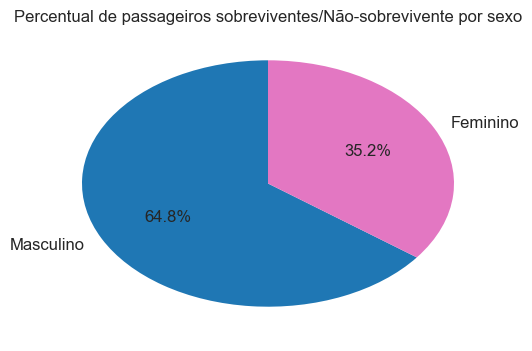

In [189]:
#Proporção em que se demonstra com ficou distribuída a população de passageiros. Nota-se que é maior para o sexo masculino.
df['Sex'].value_counts().plot.pie(colors=('tab:Blue','tab:pink') ,
   title='Percentual de passageiros sobreviventes/Não-sobrevivente por sexo',
   fontsize=12, shadow=False, startangle=90, autopct='%1.1f%%',
   labels=('Masculino','Feminino'), figsize=(6,4)).set_ylabel('')  

In [190]:
#Quantidade de passageiros por "Origem do embarque". 
#---------------------------------------------------
#
#Como visto no início deste trabalho, vVale notar que, no dataset original, existem dois passageiros
#sem identificação para essa feature. Por conta disso, o valor NaN dessa feature foi substituído por X.
#Origem do embarque: (C)herbourg, (Q)ueenstown, (S)outhampton) e (X)Origem do embarque não-identificada.

df['Embarked'].fillna('X', inplace=True)
df_org_emb = df.groupby(['Embarked','Sobreviveu'])['Embarked'].count().reset_index(name='Quantidade')
df_org_emb

,Embarked,Sobreviveu,Quantidade
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217
6,X,1,2


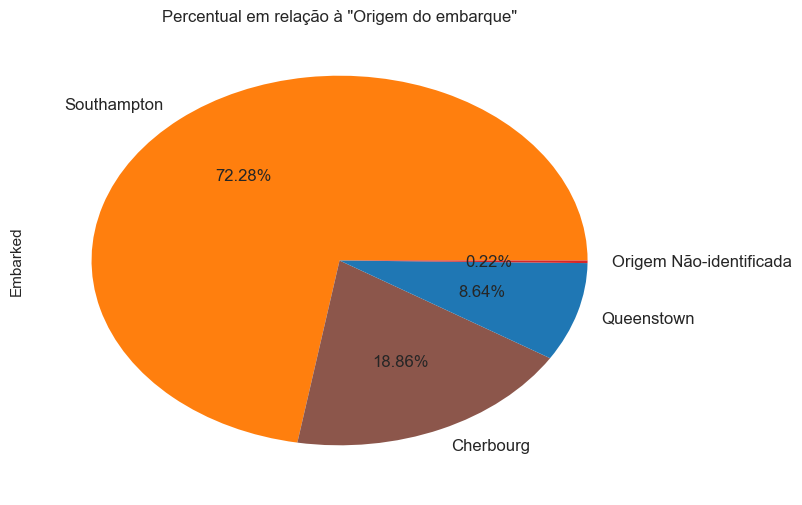

In [191]:
#Percentual do resultado acima apresentado para os passageiros por 'Origem do embarque'.
#Meramente, a título de curiosidade.
df['Embarked'].value_counts().plot.pie(colors=('tab:orange', 'tab:brown','tab:blue','tab:red') ,
   title='Percentual em relação à "Origem do embarque"',
   fontsize=12, shadow=False, startangle=0, autopct='%1.2f%%',
   labels=('Southampton','Cherbourg','Queenstown','Origem Não-identificada'), figsize=(8,6))

In [192]:
#Quantidade de passageiros por categoria de classe.
#--------------------------------------------------
#
df_corr = df.pivot_table(index='Pclass',  values='Name', aggfunc='count')
df_corr

,Name
Pclass,
1,216
2,184
3,491


Text(0,0.5,'')

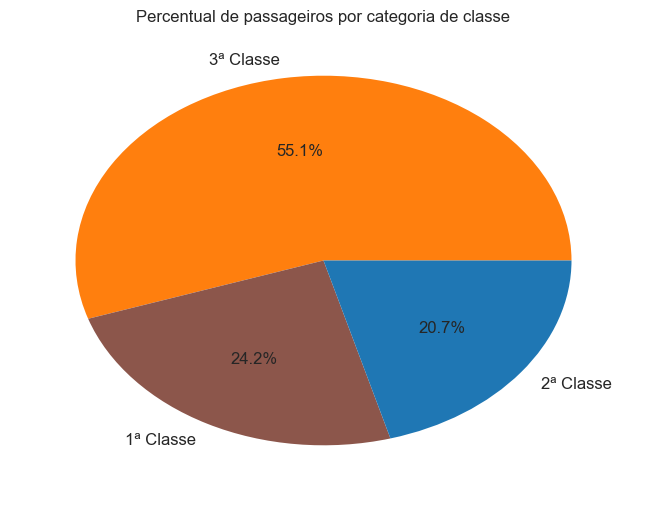

In [193]:
#Demonstração gráfica em percentual para o resultado acima apresentado conforme a classe de embarque.
df['Pclass'].value_counts().plot.pie(colors=('tab:orange','tab:brown','tab:blue','tab:red') ,
   title='Percentual de passageiros por categoria de classe',
   fontsize=12, shadow=False, startangle=0, autopct='%1.1f%%',
   labels=('3ª Classe','1ª Classe','2ª Classe'), figsize=(8,6)).set_ylabel('')  

Text(0.5,1,'Quantidade de passageiros por idade')

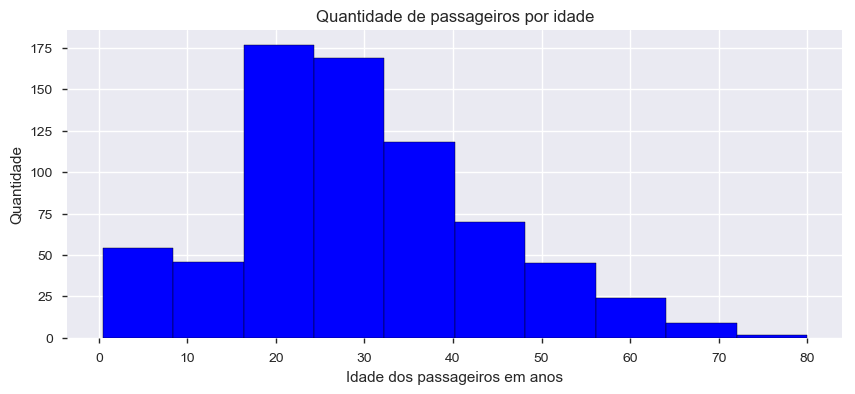

In [194]:
#Quantidade de passageiros por idade
#----------------------------------
#
df['Age'].hist(bins=10,color='b',zorder=3,edgecolor='black',figsize=(10,4)).grid(zorder=0)
plt.xlabel("Idade dos passageiros em anos")
plt.ylabel("Quantidade")
plt.title("Quantidade de passageiros por idade")

In [195]:
%%HTML
<p>O histograma acima nos traz a seguinte leitura:</p>
    <dd>. As quantidades de passageiros tidas como maiores estão na faixa entre, aproximadamente, 18 e menos de 35 anos.</dd>    

In [196]:
#Quantidade de sobreviventes/Não-sobreviventes (feature Sobreviveu = 1-Sobrevivente --- 0-Não-sobrevivente)
#--------------------------------------------------------------------------------------------------------
#
#df_filtered = df.query('Sobreviveu == 1')
df_sobrev_nsobrev = df.groupby(['Sobreviveu'])['Sobreviveu'].count().reset_index(name='Quantidade')
df_sobrev_nsobrev


,Sobreviveu,Quantidade
0,0,549
1,1,342


Text(0,0.5,'')

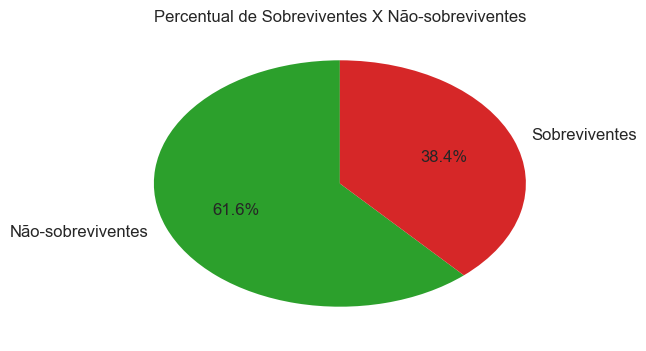

In [197]:
#Demonstração gráfica do resultado acima apresentado (Sobreviventes X Não-sobreviventes)
#Quase dois terços, consoante o dataset apresentado, dos passageiros embarcados não sobreviveram.
df['Sobreviveu'].value_counts().plot.pie(colors=('tab:green', 'tab:red') ,
   title='Percentual de Sobreviventes X Não-sobreviventes', fontsize=12,
   shadow=False, startangle=90, autopct='%1.1f%%',
   labels=('Não-sobreviventes','Sobreviventes'), figsize=(6,4)).set_ylabel('')  

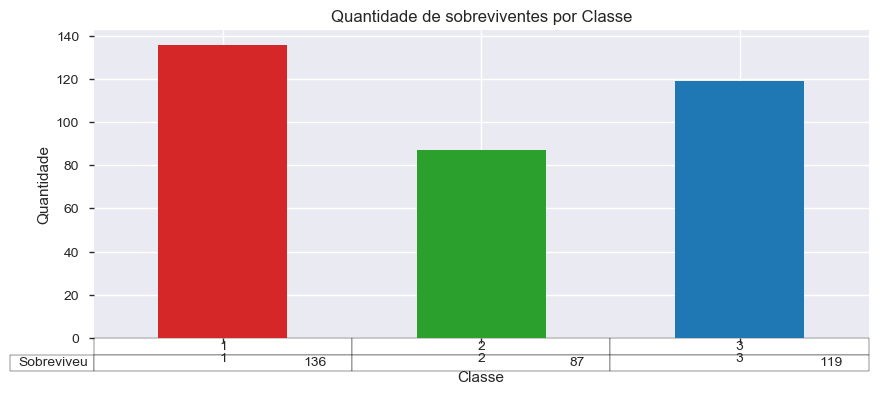

In [198]:
#Quantidade de SOBREVIVENTES(Sobreviveu == 1) por classe
#-----------------------------------------------------
#
#Vê-se, de forma clara, que mais sobreviventes ocorreu na primeira classe.
df[df['Sobreviveu'] == 1].groupby('Pclass').sum()['Sobreviveu'].plot(kind='bar',
                        title='Quantidade de sobreviventes por Classe',
                        figsize=(10,4),
                        table=True,
                        color=(['tab:red', 'tab:green', 'tab:blue']),
                        rot=0).set_xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

Text(0.5,0,'Quantidade')

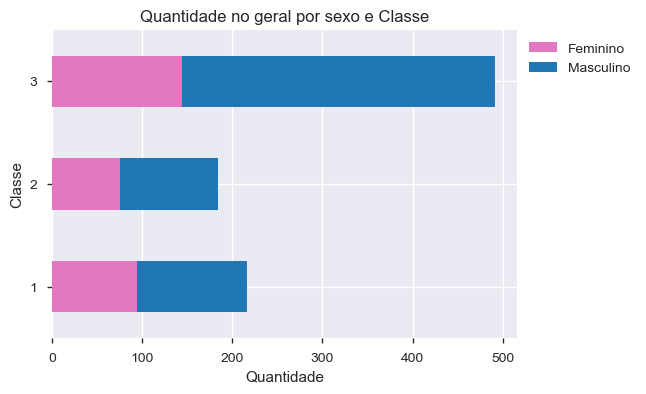

In [199]:
#Quantidade no geral por sexo e classe
#-------------------------------------
#
df.pivot_table('PassengerId', ['Pclass'], 'Sex', aggfunc='count').sort_index().plot(kind='barh', 
              color=('tab:pink','tab:blue'), stacked=True, figsize=(6,4),
              title='Quantidade no geral por sexo e Classe').legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel('Classe')
plt.xlabel('Quantidade')

In [200]:
#Quantidade de sobreviventes/Não-sobreviventes por Categoria de classe
#--------------------------------------------------------------------
#
df.pivot_table(index=('Sex','Pclass'), values=('Sobreviveu','Não sobreviveu'), aggfunc=np.sum)[['Sobreviveu','Não sobreviveu']]

Sobreviveu  Não sobreviveu
Sex       Pclass                            
Feminino  1               91               3
          2               70               6
          3               72              72
Masculino 1               45              77
          2               17              91
          3               47             300

Text(0,0.5,'Quantidade')

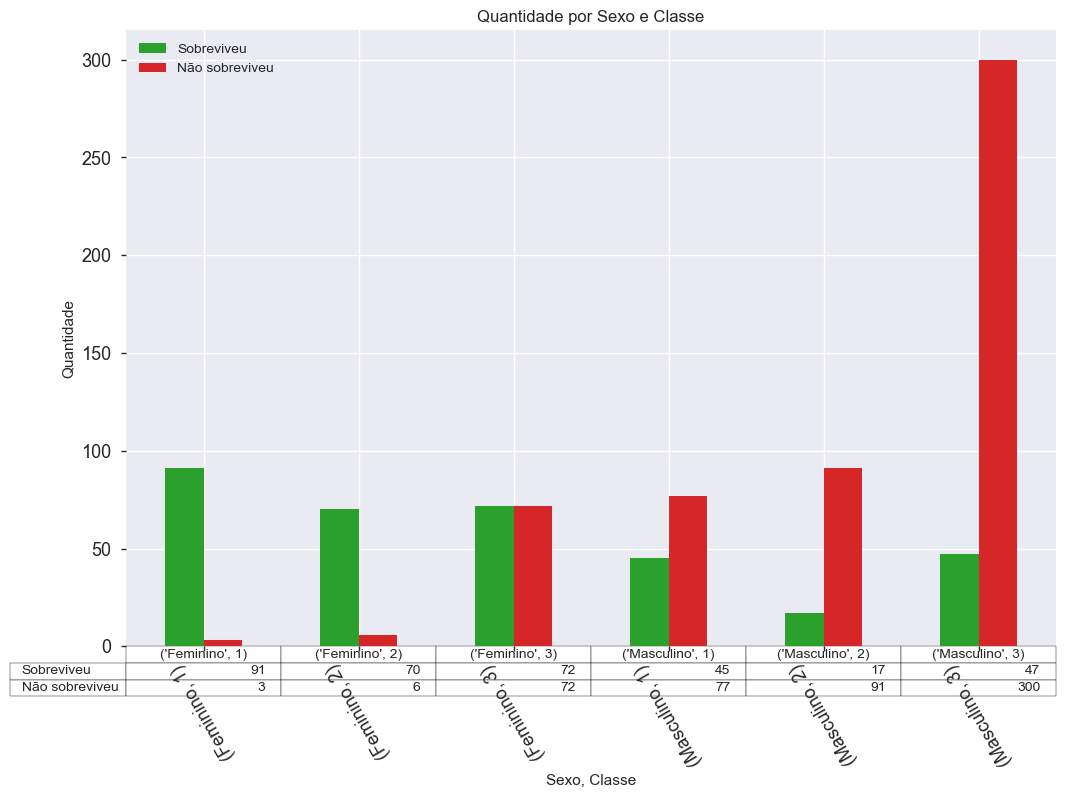

In [201]:
#Demonstração com quantidades e proporções para sobreviventes e Não-sobreviventes por sexo e classe
#--------------------------------------------------------------------------------------------------
df.pivot_table(index=('Sex','Pclass'),  values=('Sobreviveu','Não sobreviveu'),
        aggfunc=np.sum)[['Sobreviveu','Não sobreviveu']].plot(kind='bar', 
        color=('tab:green','tab:red'),
        figsize=(12,8),
        table=True,
        fontsize=13,
        rot=120,
        title='Quantidade por Sexo e Classe').set_xlabel('Sexo, Classe')
plt.ylabel('Quantidade')

In [202]:
%%HTML
<dd>No histograma acima, verifica-se que se por um lado, a quantidade de passageiros embarcados para a terceira classe é maior que
a quantidade de passageiros da segunda, bem como da primeira classes, no que tange aos sobreviventes, a quantidade para a primeira
classe e para a segunda, em termos de proporção, estão acima daquela(terceira classe). Em relação à terceira classe, para o 
contingente feminino, o grau de sobrevivência ficou pela metade.</dd>

In [203]:
#Quantidade no geral de passageiros para adultos e crianças
#------------------------------------------------------------
#
#Segundo o ECA - Estatuto da Criança e do Adolescente -, é considerado criança o cidadão que tem até 12 anos incompletos.
#Aqueles com idade entre 12 e 18 anos são adolescentes.
#Existem 177 linhas com a feature "Age" igual a a Nan que não serão consideradas para estatística.
print('Quantidade de passageiros adultos: {0}'.format(df[df.Age >= 12].shape[0]))
print('Quantidade de passageiros não-crianças: {0}'. format(df[df.Age < 12].shape[0]))

Quantidade de passageiros adultos: 646
Quantidade de passageiros não-crianças: 68


In [204]:
#Total de crianças/Não-crianças que sobreviveram
#-------------------------------------------------
#
df_idade = df
df_idade['Cri_Adl'] = 0   #Cria uma coluna para receber ora "Criança" ora "Não-criança"
df_idade.drop('Cri_Adl',axis=1, inplace=True) #Remove linhas para a feature "Age" igual a Nan
df_idade.loc[df_idade[df_idade['Age'] < 12].index, 'Cri_Adl'] = 'Criança'
df_idade.loc[df_idade[df_idade['Age'] >= 12].index, 'Cri_Adl'] = 'Não-Criança'
df_idade.groupby('Cri_Adl')[['Sobreviveu']].sum()

,Sobreviveu
Cri_Adl,
Criança,39
Não-Criança,251


    Média de crianças sobreviventes: 57.35%
Média de Não-crianças sobreviventes: 38.85%


(Text(0,0.5,''), Text(0.5,0,''))

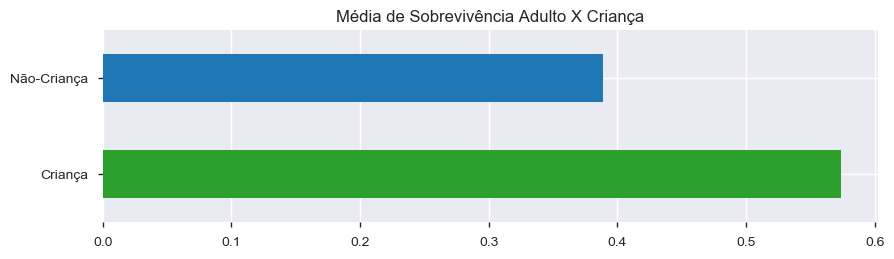

In [205]:
#Média de sobrevivência para Criança/Não-criança
#-------------------------------------------------
#
df_media = df_idade.groupby('Cri_Adl')[['Sobreviveu']].mean()
md1 = float(df_media.loc['Criança']) * 100
md2 = float(df_media.loc['Não-Criança']) * 100
print ('    Média de crianças sobreviventes: {0:3.2f}%'.format(md1))
print ('Média de Não-crianças sobreviventes: {0:3.2f}%'.format(md2))
df_idade.groupby('Cri_Adl')['Sobreviveu'].mean().plot.barh(title='Média de Sobrevivência Adulto X Criança',
                                figsize=(10,2.5),
                                color=('tab:green','tab:blue')).set_ylabel(''),plt.xlabel('')